[0, 31.915, 56.425, 76.455, 95.665, 112.39, 127.065, 137.86, 148.52, 156.64, 164.735, 172.46, 180.32, 187.0, 193.99, 200.075, 204.935, 209.475, 213.52, 218.02, 222.76, 227.06, 230.855, 234.485, 238.295, 242.005, 245.915, 249.155, 252.93, 256.085, 259.135, 262.27, 265.07, 267.805, 270.655, 273.6, 276.34, 279.325, 281.9, 284.225, 286.865, 289.41, 292.14, 294.51, 296.94, 299.4, 301.895, 304.455, 306.895, 308.97, 311.265, 313.475, 315.89, 318.14, 320.415, 322.705, 325.075, 327.395, 329.335, 331.3, 333.235, 335.15, 337.025, 338.85, 340.825, 342.81, 344.73, 346.9, 348.9, 350.825, 352.9, 354.835, 356.84, 358.685, 360.6, 362.62, 364.725, 366.635, 368.57, 370.35, 372.215, 374.19, 375.925, 377.74, 379.455, 381.285, 383.19, 384.91, 386.6, 388.7, 390.39, 392.325, 394.11, 395.875, 397.855, 399.835, 401.755, 403.56, 405.2, 406.84, 408.515, 410.28, 412.155, 413.94, 415.495, 417.195, 418.975, 420.755, 422.555, 424.06, 425.76, 427.48, 429.15, 430.975, 432.655, 434.31, 436.02, 437.62, 439.125, 440.57, 4

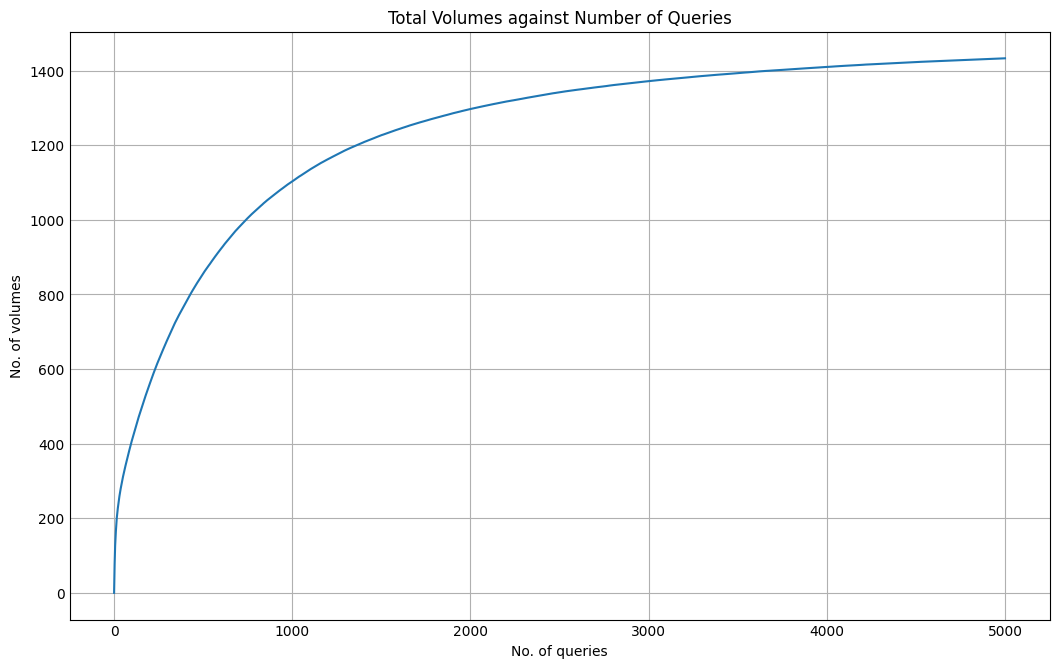

In [8]:
import math 
import random 
import matplotlib.pyplot as plt 

RSEmax = 512

query_range_list = []
for i in range (RSEmax):
    for j in range (i+1):
        query_range_list.append(j)

def query_gen():
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)


def cover_log(start_int, end_int):
    c = 0
    query_list = []
    while start_int <= end_int:
        c = start_int
        for i in range(2, int(math.log(RSEmax, 2))+1):
            if end_int == start_int + 1:
                c = end_int
                break
            if start_int % 2 == 0:
                if end_int - start_int < 4:
                    c = start_int + 1
                    break
                else:
                    c = start_int
                    break
            if start_int + (2**i -1) > end_int:
                break
            else:    
                c = start_int + (2**i -1)
            if start_int % 2**(i-1) != 1:
                c = start_int + (2**(i-1) -1)
                break   
      
        node = (start_int, c)
        query_list.append(node)
        start_int = c+1
    return query_list

max_volumes = 3*RSEmax - (math.log(RSEmax, 2)+2)
no_of_runs = 200
no_of_queries = 5000
def log_query(no_of_runs,no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = []
        vol_sum = 0
        query_tracker = []
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) == max_volumes: 
                for i in range(max_volumes, no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                for i in range(int((RSEmax*(RSEmax + 1))/2), no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            else:
                query_tracker.append(query_asked)
                (a,b) = query_asked
                query_list = cover_log(a,b)
                for i in query_list:
                    if i not in vol_tracker:
                        vol_tracker.append(i)
                        vol_sum +=1
                arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    print(arr)
    return(arr)

arr = log_query(no_of_runs,no_of_queries) 

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()